# Inventory and Spend Exploratory Data Analysis - ABC Company

Objectives:

- Enhance data accuracy and decision-making through strategic handling of missing values.
- Optimize inventory to align with current market demand and minimize excess stock.
- Analyze sales data to identify trends, preferences, and opportunities for growth.
- Evaluate purchasing practices to ensure efficiency and cost-effectiveness in procurement.

1. Missing Value Strategy:

- Implement methods to manage and mitigate the impact of missing data across datasets.
- Ensure data integrity by filling or removing gaps, enhancing the foundation for accurate analysis.

2. Inventory Analysis:

- Conduct a detailed review of inventory levels, focusing on products with zero inventory and fluctuating stock levels.
- Identify high-demand products requiring inventory adjustments and low-demand items for reassessment.
- Data used: beg_inv, end_inv

3. Sales Analysis:

- Analyze sales performance, highlighting top-performing products and those with declining sales.
- Investigate sales trends, including seasonal variations and consumer buying patterns, to improve demand forecasting.
- Data used: sales

4. Purchasing Analysis:

- Assess procurement activities, examining spending patterns and supplier performance.
- Explore the relationship between purchase volumes, costs, and supplier selection to optimize procurement strategies.
- Data used: purchases, invoice_purchases

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Loading datasets
purchase_prices = pd.read_csv(path+ '2017PurchasePricesDec.csv')
beg_inv = pd.read_csv(path+ '/BegInvFINAL12312016.csv')
end_inv = pd.read_csv(path+ 'EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv(path+ '/InvoicePurchases12312016.csv')
purchases = pd.read_csv(path+ '/PurchasesFINAL12312016.csv')
sales = pd.read_csv(path+ '/SalesFINAL12312016.csv')


In [4]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())
print(f"Number of rows: {len(purchase_prices)}\n")

print("beg_inv Columns:")
print(beg_inv.columns.tolist())
print(f"Number of rows: {len(beg_inv)}\n")

print("end_inv Columns:")
print(end_inv.columns.tolist())
print(f"Number of rows: {len(end_inv)}\n")

print("invoice_purchases Columns:")
print(invoice_purchases.columns.tolist())
print(f"Number of rows: {len(invoice_purchases)}\n")

print("purchases Columns:")
print(purchases.columns.tolist())
print(f"Number of rows: {len(purchases)}\n")

print("sales Columns:")
print(sales.columns.tolist())
print(f"Number of rows: {len(sales)}\n")


purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']
Number of rows: 12261

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']
Number of rows: 206529

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']
Number of rows: 224489

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']
Number of rows: 5543

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']
Number of rows: 2372474

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', '

In [5]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    total_cells = np.product(data.shape)
    missing_values = data.isnull().sum()
    total_missing = missing_values.sum()
    if total_missing > 0:
        # Calculate percentage of missing values
        missing_percentage = (total_missing / total_cells) * 100
        print(f"\n{name} - Missing Data Summary:")
        print(f"Total missing cells: {total_missing}")
        print(f"Percentage of dataset missing: {missing_percentage:.2f}%")
        # Provide a summarized output for missing data
        print("Columns with missing values and their count:")
        print(missing_values[missing_values > 0])
    else:
        print(f"\n{name} has no missing values.")



purchase_prices - Missing Data Summary:
Total missing cells: 3
Percentage of dataset missing: 0.00%
Columns with missing values and their count:
Description    1
Size           1
Volume         1
dtype: int64

beg_inv has no missing values.

end_inv - Missing Data Summary:
Total missing cells: 1284
Percentage of dataset missing: 0.06%
Columns with missing values and their count:
City    1284
dtype: int64

invoice_purchases has no missing values.

purchases - Missing Data Summary:
Total missing cells: 3
Percentage of dataset missing: 0.00%
Columns with missing values and their count:
Size    3
dtype: int64

sales has no missing values.


## 1. Missing Value Strategy

Ensuring data integrity is critical for accurate analysis. Here's how we tackle missing data for informed decision-making:

* For **purchase_prices**, small gaps in 'Description', 'Size', and 'Volume' are filled by deleting these rows for simplicity and data integrity.

* In **end_inv**, 'City' values are deduced from 'Store' data, enhancing location accuracy. If unmatched, we default to 'Unknown' to maintain data consistency.

* Missing 'Approval' statuses in **invoice_purchases** are designated as 'Pending', providing a placeholder for future updates.

* Lastly, the 'Size' field in **purchases** with missing entries is pruned to uphold dataset quality.

In [6]:
# Handling missing values for purchase_prices dataset
purchase_prices.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

# Handling missing values for end_inv dataset
city_store_mapping = end_inv.drop_duplicates(subset=['Store']).set_index('Store')['City']
end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping)).fillna('Unknown')

# Handling missing values for invoice_purchases dataset
invoice_purchases['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases.dropna(subset=['Size'], inplace=True)

# Checking for remaining missing values in all datasets
for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    if missing_values.any():
        print(f"\nMissing values in {name}:")
        print(missing_values[missing_values > 0])
    else:
        print(f"\nNo missing values in {name}.")



No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

No missing values in purchases.

No missing values in sales.


## 2. Inventory Analysis

In [7]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

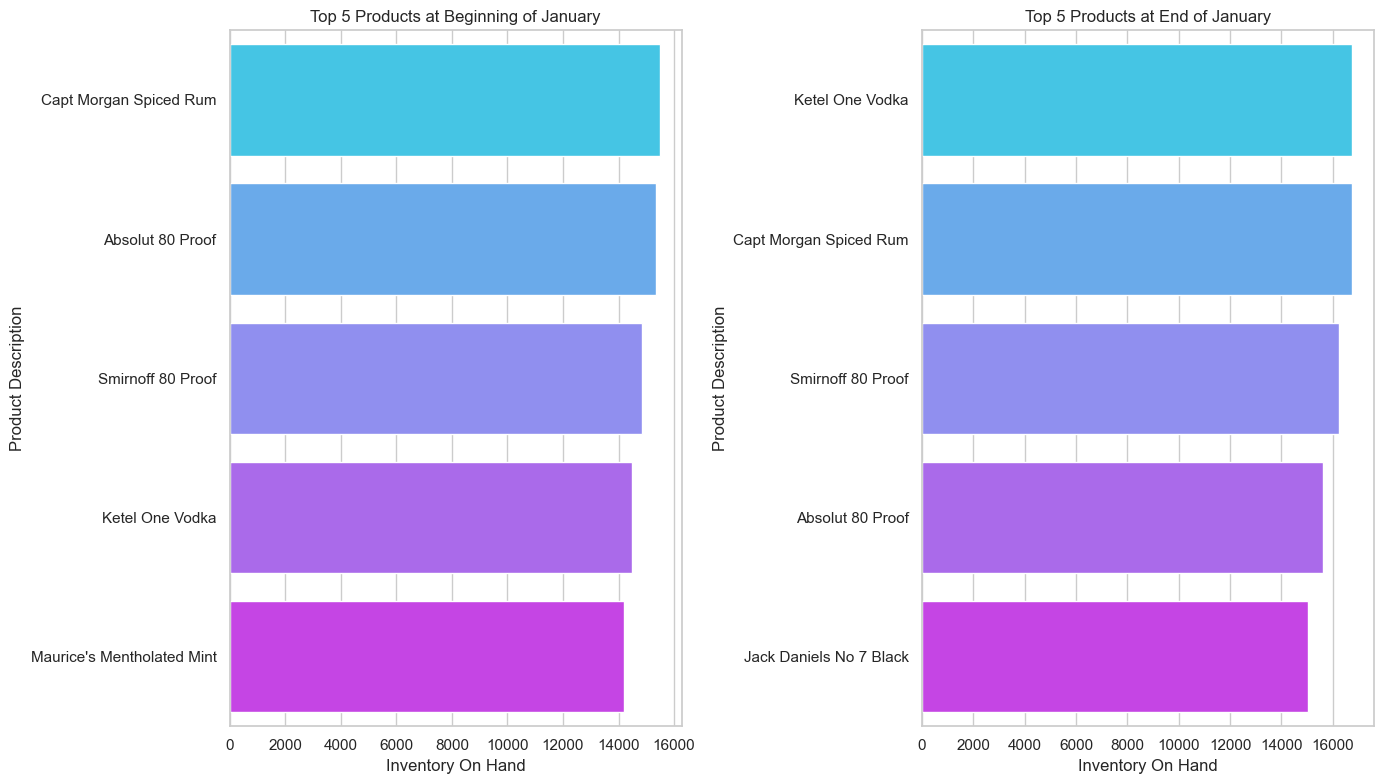

In [36]:
# Set up the matplotlib figure
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a color palette
palette = sns.color_palette("cool", n_colors=5)

# Top 5 bar plot beginning
plt.subplot(1, 2, 1)
sns.barplot(x=top_5_beg.values, y=top_5_beg.index.map(lambda x: x[1]), palette=palette)
plt.title('Top 5 Products at Beginning of January')
plt.xlabel('Inventory On Hand')
plt.ylabel('Product Description')

# Bottom 5 bar plot end of year
plt.subplot(1, 2, 2)
sns.barplot(x=top_5_end.values, y=top_5_end.index.map(lambda x: x[1]), palette=palette)
plt.title('Top 5 Products at End of January')
plt.xlabel('Inventory On Hand')
plt.ylabel('Product Description')

# Finalize the plot
plt.tight_layout()
plt.show()

### 2.1 Product Insights

**Top Products:**  

- Rising Product: "Ketel One Vodka" showed an impressive increase, moving from the 4th position at the beginning of the year to the top spot by year-end. This suggests a growing preference for this brand among consumers, highlighting its robust market demand and effective inventory management to meet consumer needs.

- Consistent Performer: "Capt Morgan Spiced Rum" displayed remarkable consistency, starting the year at the top and finishing a close second. This tiny margin suggests sustained popularity and effective restocking strategies to closely match "Ketel One Vodka."

- Brand Evolution: The shift in brand number for "Smirnoff 80 Proof" from 3876 to 8111 while maintaining its presence in the top products list indicates a possible rebranding or cataloging change. Despite this, it managed to increase its inventory, reflecting enduring consumer loyalty or promotional efforts.

- New Entry: The entry of "Jack Daniels No 7 Black" into the top 5 underscores a successful year for the brand, possibly due to marketing campaigns or new consumer trends favoring whiskey.

**Bottom Products Analysis:**

- Zero Inventory Concern: The presence of products with zero inventory at both the beginning and end of the year raises questions about their demand or supply chain issues. These could be niche or seasonal products, but their consistent lack of stock suggests a need for reassessment of their place in the inventory.

- Changing Bottom Ranks: The complete turnover in the bottom 5 products list indicates fluctuating inventory levels for lower-demand items. This could reflect attempts to rotate stock for these products or difficulties in predicting their demand.

**Strategic Observations:**

- Demand Forecasting: The top products' sales performance suggests that demand forecasting and inventory replenishment are well-aligned for popular items. The close competition between "Ketel One Vodka" and "Capt Morgan Spiced Rum" highlights the importance of accurate demand prediction and agile inventory management.

- Inventory Review for Low Performers: The consistent zero inventory for certain products suggests a need for a strategic review. It might be beneficial to either improve marketing efforts for these products, reassess their demand, or consider discontinuing them to free up resources for more profitable items.

- Market Trends and Consumer Preferences: The entrance of "Jack Daniels No 7 Black" into the top products and the consistent performance of vodka and rum brands reflect prevailing market trends and consumer preferences. Adapting inventory strategies to capitalize on these trends can drive sales and improve inventory turnover.

### 2.2 Store Inventory Analysis

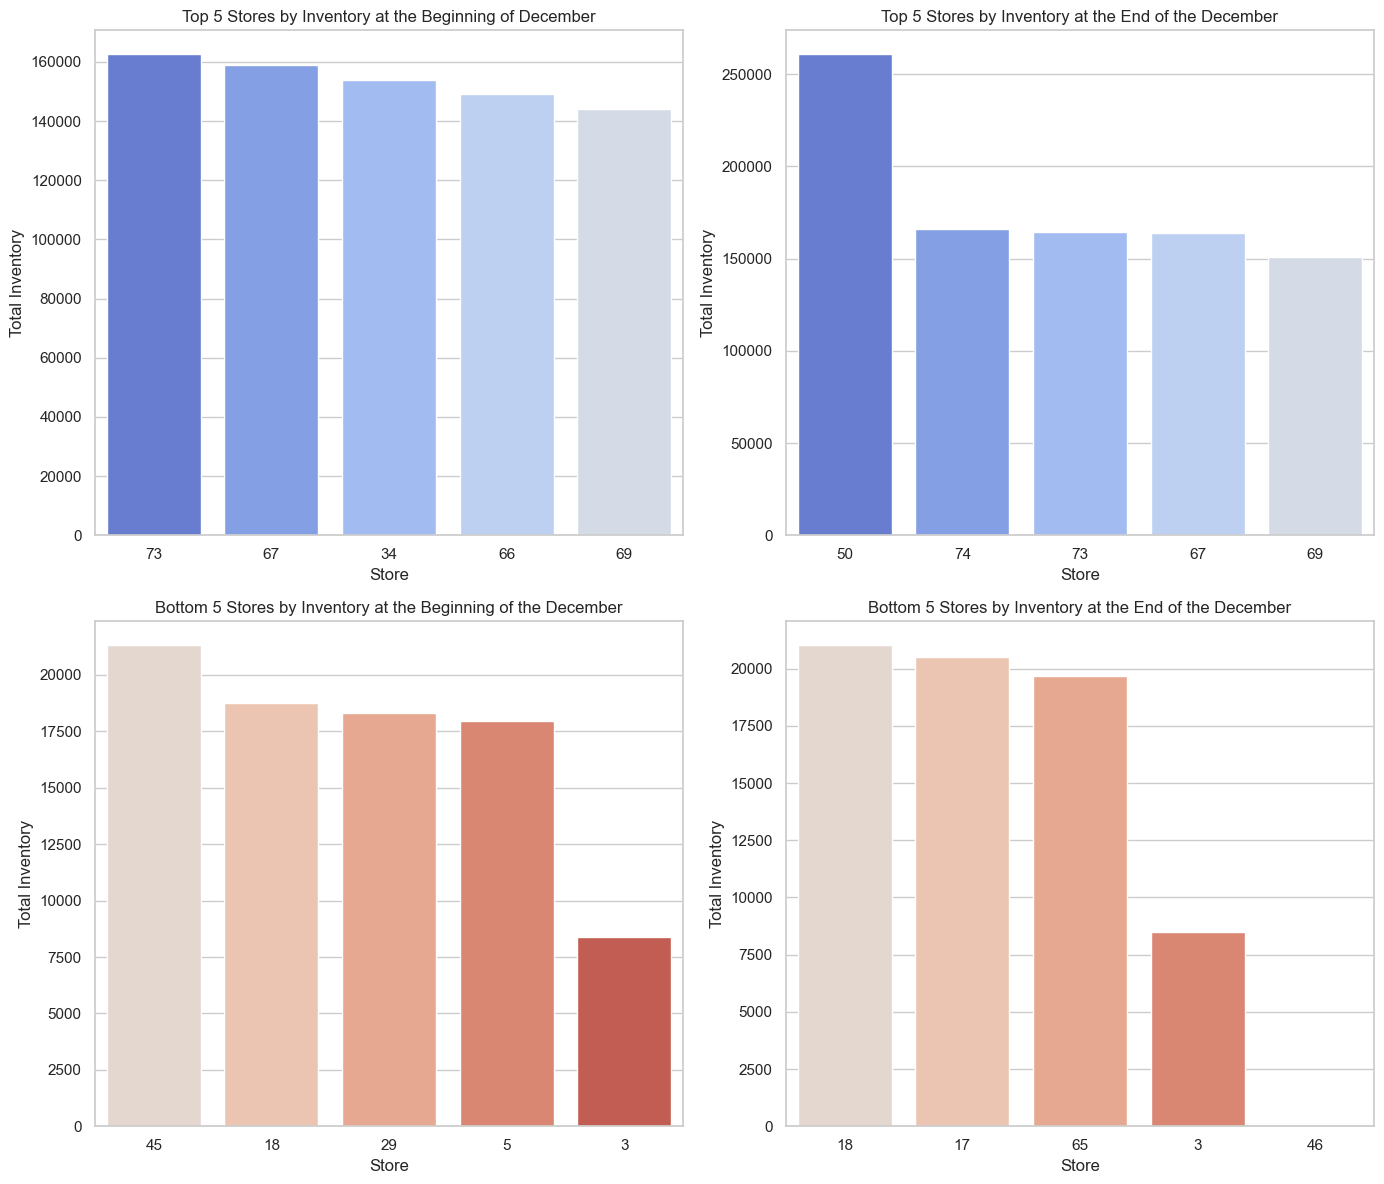

In [37]:
# Calculate the total inventory per store at the beginning and end
total_beg_inv = beg_inv.groupby('Store')['onHand'].sum().sort_values(ascending=False)
total_end_inv = end_inv.groupby('Store')['onHand'].sum().sort_values(ascending=False)

# Identify the top 5 and bottom 5 stores at the beginning and end of the period
top_5_beg_stores = total_beg_inv.head(5)
bottom_5_beg_stores = total_beg_inv.tail(5)
top_5_end_stores = total_end_inv.head(5)
bottom_5_end_stores = total_end_inv.tail(5)

# Define a color palette
palette = sns.color_palette("coolwarm", 10)

# Plot for the beginning of the period
plt.figure(figsize=(14, 12))

# Top 5 Stores at the beginning
plt.subplot(2, 2, 1)
sns.barplot(x=top_5_beg_stores.index, y=top_5_beg_stores.values, palette=palette[:5], order=top_5_beg_stores.index)
plt.title('Top 5 Stores by Inventory at the Beginning of December')
plt.xlabel('Store')
plt.ylabel('Total Inventory')

# Bottom 5 Stores at the beginning
plt.subplot(2, 2, 3)
sns.barplot(x=bottom_5_beg_stores.index, y=bottom_5_beg_stores.values, palette=palette[5:], order=bottom_5_beg_stores.index)
plt.title('Bottom 5 Stores by Inventory at the Beginning of the December')
plt.xlabel('Store')
plt.ylabel('Total Inventory')

# Plot for the end of the period
plt.subplot(2, 2, 2)
sns.barplot(x=top_5_end_stores.index, y=top_5_end_stores.values, palette=palette[:5], order=top_5_end_stores.index)
plt.title('Top 5 Stores by Inventory at the End of the December')
plt.xlabel('Store')
plt.ylabel('Total Inventory')

plt.subplot(2, 2, 4)
sns.barplot(x=bottom_5_end_stores.index, y=bottom_5_end_stores.values, palette=palette[5:], order=bottom_5_end_stores.index)
plt.title('Bottom 5 Stores by Inventory at the End of the December')
plt.xlabel('Store')
plt.ylabel('Total Inventory')

plt.tight_layout()
plt.show()


### 2.3 Store Insights

**Top Stores Analysis:**

- Store 50's leap to the top by the end of February, with an inventory count of 260,717, underscores a significant restocking effort or an increase in product range. This dramatic change could indicate a strategic shift, possibly to cater to a surge in demand or an expansion in product offerings.

- Consistency in Top Performers: Stores 73, 67, and 69 maintained their positions among the top stores from the beginning of January to the end of February. This consistency suggests effective inventory management and possibly a stable consumer demand within these stores.

- Store 74's Entrance: The entry of Store 74 into the top 5 by the end of February, alongside substantial inventory increases in other top stores, might reflect a strategic response to competitive pressures or market opportunities identified by these stores.

**Bottom Stores Analysis:**

- Persistent Low Inventory: Store 3 consistently appears among the bottom 5, with a marginal increase in inventory. This could reflect a niche market focus, space constraints, or challenges in stock replenishment.

- Concerning Drop to Zero: The drop of Store 46 to zero inventory by the end of February is alarming. It indicates stockout situations which could significantly impact sales and customer satisfaction. This warrants an immediate investigation into supply chain and restocking processes.

- Fluctuations in Bottom Stores: The variation in the bottom stores, with Store 18's inventory slightly increasing, suggests different challenges or strategies across stores. It may point to varying customer demographics, sales patterns, or inventory management practices.

**Inventory Management Observations**:

- Dynamic Inventory Adjustments: The data reflects dynamic inventory adjustments in response to sales trends, market demand, or strategic shifts in store focus. Particularly, the top stores show an ability to significantly increase their inventory levels, possibly leveraging economies of scale.

- Strategic Insights for Improvement: The bottom stores, especially those with minimal changes or drops to zero, highlight critical areas for improvement. These stores may benefit from tailored strategies such as diversifying product ranges, improving supply chain logistics, or enhancing marketing efforts to increase footfall and sales.

- Balancing Act: The balance between maintaining high inventory levels to meet demand without overstocking is crucial. The top stores' performance indicates robust demand forecasting and inventory management practices, while the bottom stores may need to revisit their inventory strategies to avoid understocking or overstocking scenarios.

## 3. Sales Analysis

In [31]:
# Finding the best-selling products
top_5_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(5)
print(f" Top 5 Products:\n{top_5_products}\n")

# Finding the slow-moving products
bottom_5_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(5)
print(f"Bottom 5 Products:\n{bottom_5_products}")

 Top 5 Products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411

Bottom 5 Products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc              1


### Figure 3.1 'Average Sales and Average Inventory Level for Top & Bottom 5 Brands'

Top 5 Products by Average Sales:
   Brand               Description  AvgSalesQuantity
0   5954  Fireball Cinnamon Whisky              96.0
1  14962          Stone Barn Chard              96.0
2  24075               Bouvet Brut              72.0
3    818    Gordons London Dry Gin              72.0
4  15529        Goose Ridge Red g3              72.0

Bottom 5 Products by Average Sales:
   Brand                   Description  AvgSalesQuantity
0  25106    Pulenta Est Gran Cab Franc               1.0
1  24275          Becker Family Pnt Bl               1.0
2  24276  Paul Buisse Svgn Bl Touraine               1.0
3  24279  Fontanafredda La Rosa Barolo               1.0
4  24285          Dom Clavel Languedoc               1.0


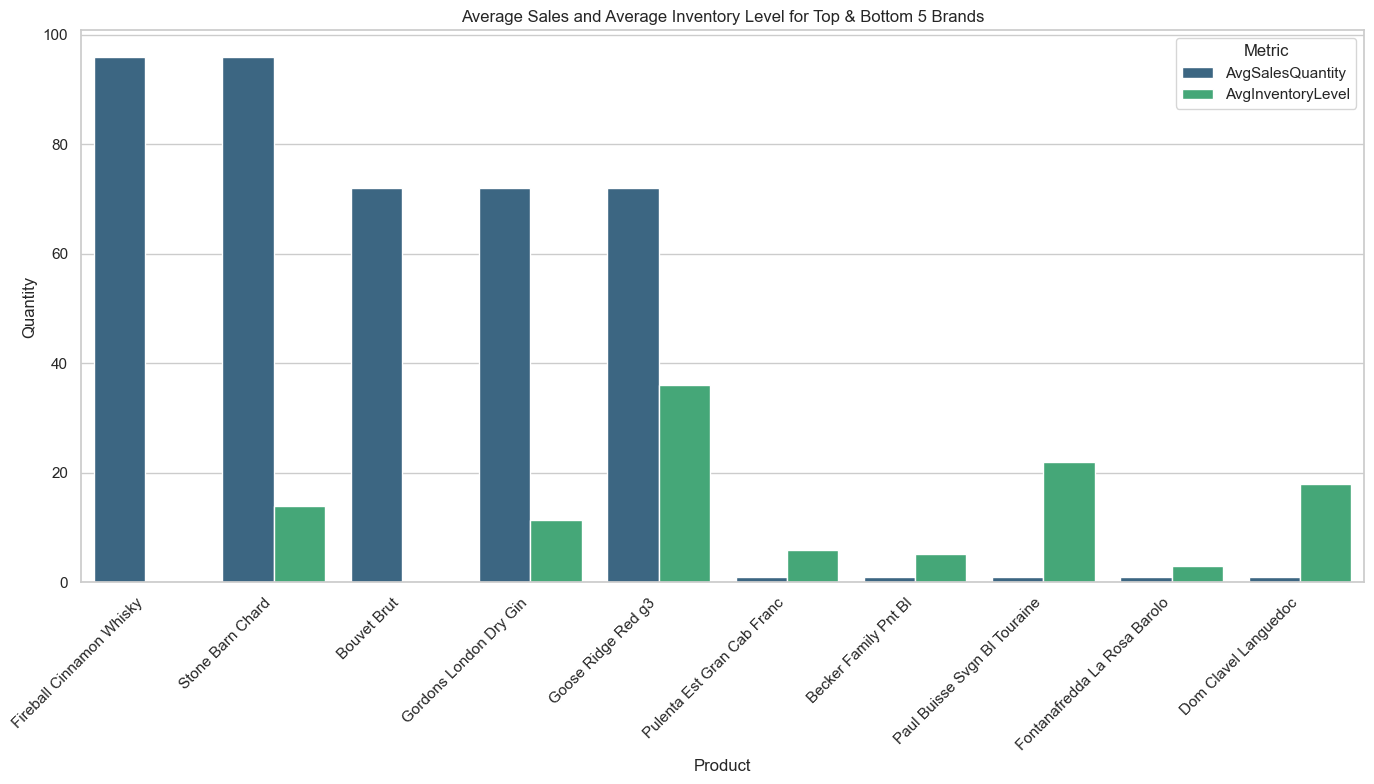

In [40]:
# Calculate average sales quantity for each product
avg_sales = sales.groupby(['Brand', 'Description'])['SalesQuantity'].mean()

# Finding the best-selling products based on average sales
top_5_avg_sales = avg_sales.sort_values(ascending=False).head(5).reset_index(name='AvgSalesQuantity')
print(f"Top 5 Products by Average Sales:\n{top_5_avg_sales}\n")

# Finding the slow-moving products based on average sales
bottom_5_avg_sales = avg_sales.sort_values(ascending=True).head(5).reset_index(name='AvgSalesQuantity')
print(f"Bottom 5 Products by Average Sales:\n{bottom_5_avg_sales}")

# Calculate average inventory level
avg_inventory = pd.concat([beg_inv, end_inv]).groupby(['Brand', 'Description'])['onHand'].mean().reset_index(name='AvgInventoryLevel')

# Merge average sales and inventory level with top 5 products
top_5_merged = top_5_avg_sales.merge(avg_inventory, on=['Brand', 'Description'], how='left')

# Merge average sales and inventory level with bottom 5 products
bottom_5_merged = bottom_5_avg_sales.merge(avg_inventory, on=['Brand', 'Description'], how='left')

# Concatenate top 5 and bottom 5 for plotting
combined_data = pd.concat([top_5_merged, bottom_5_merged])

# Melt the DataFrame to have a long-format DataFrame suitable for sns.barplot
melted_data = combined_data.melt(id_vars=['Brand', 'Description'], value_vars=['AvgSalesQuantity', 'AvgInventoryLevel'], var_name='Metric', value_name='Quantity')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Description', y='Quantity', hue='Metric', data=melted_data, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Average Sales and Average Inventory Level for Top & Bottom 5 Brands')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.legend(title='Metric', loc='upper right')

plt.tight_layout()
plt.show()


### 3.1 Average Sales and Average Inventory Level Insights

1. Inventory Levels vs. Sales: Discrepancies are evident between sales and inventory for certain products. "Fireball Whiskey" and "Bouvet Brut," for example, show high sales against lower inventory levels, suggesting a risk of stockouts. Given the zero inventory at December's start and end, replenishment likely occurred in January to enable sales.

2. Potential Overstock for Low-Sale Products: The products on the far right, such as "Paul Buisse Sgn Bl Touraine" and "Fontanafredda La Rosa Barolo", show a higher average inventory level compared to their sales quantity. This could indicate overstocking, which may lead to increased holding costs or stock becoming obsolete.

3. Demand Planning: The contrast between the average sales and inventory levels across the products suggests that demand planning and inventory management could be optimized. Products with high sales but low inventory might need better restocking strategies, while products with low sales and high inventory might require promotional activities to boost sales or a review of purchasing decisions.

### Brand to product evaluation

In [51]:
# Count the number of unique brands per description
brands_per_description = sales.groupby('Description')['Brand'].nunique()

# Filter descriptions with more than one brand
descriptions_with_multiple_brands = brands_per_description[brands_per_description > 1]

descriptions_with_multiple_brands.sort_values(ascending=False)

Description
Jagermeister Liqueur           7
Bacardi Superior Rum           7
Jim Beam                       6
Capt Morgan Spiced Rum         6
Patron Silver Tequila          6
                              ..
Jenkins Vodka                  2
Jenkins Rum                    2
Jenkins Amaretto               2
Jaume Serra Cristalino Brut    2
Midnight Moon Strawberry       2
Name: Brand, Length: 520, dtype: int64

In [60]:
# Filter sales data for the specific product description
specific_product_sales = sales[sales['Description'] == 'Jagermeister Liqueur']
# Group by Brand and count the unique number of stores for each brand
stores_per_brand = specific_product_sales.groupby('Brand')['Store'].nunique()

stores_per_brand

Brand
812     50
5094    13
5401    76
5440    74
5445    79
5447    77
5952    78
Name: Store, dtype: int64

In [59]:
specific_description_info = purchase_prices[purchase_prices['Description']== 'Jagermeister Liqueur']

specific_description_info

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
81,812,Jagermeister Liqueur,22.99,1000mL,1000,1,17.03,3089,SIDNEY FRANK IMPORTING CO
1259,5401,Jagermeister Liqueur,5.99,200mL,200,1,4.64,3089,SIDNEY FRANK IMPORTING CO
1266,5440,Jagermeister Liqueur,34.99,1750mL,1750,1,25.92,3089,SIDNEY FRANK IMPORTING CO
1268,5445,Jagermeister Liqueur,15.99,750mL,750,1,11.76,3089,SIDNEY FRANK IMPORTING CO
1269,5447,Jagermeister Liqueur,9.99,375mL,375,1,7.63,3089,SIDNEY FRANK IMPORTING CO
1359,5952,Jagermeister Liqueur,1.99,50mL,50,1,1.42,3089,SIDNEY FRANK IMPORTING CO
5646,5094,Jagermeister Liqueur,3.49,100mL,100,1,2.68,3089,SIDNEY FRANK IMPORTING CO


### Evaluation 

It seems that some products have multiple brands with Jagermeister Liqeur as an example of each brand number representing a difference in volume for the products.

### Figure 3.2 'Sales Quantity From Jan to Feb (Including Weekend Highlight)'

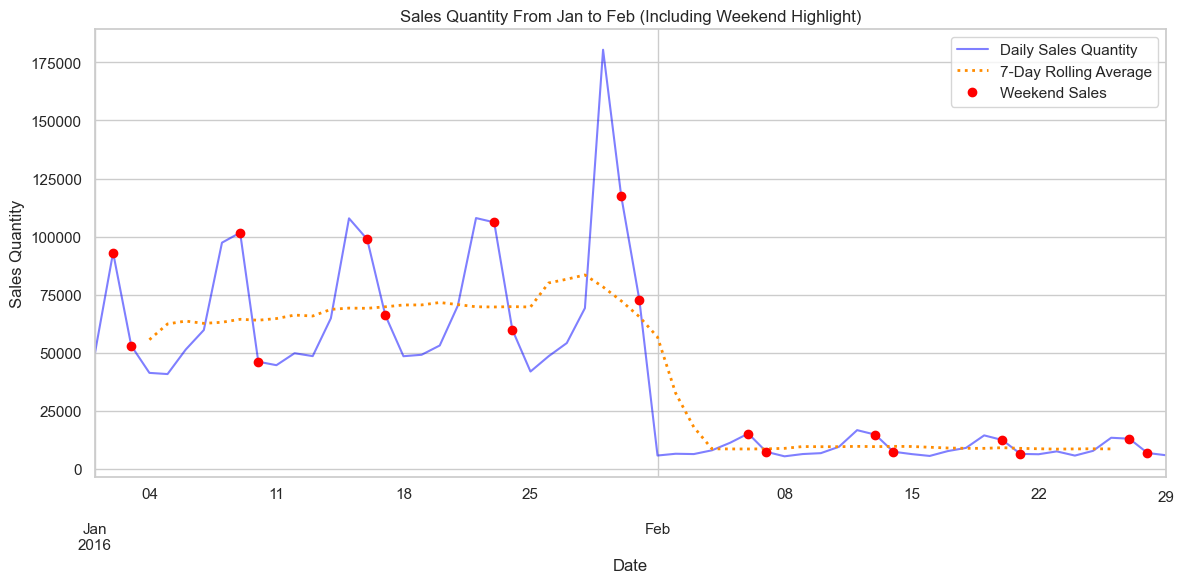

In [70]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate')['SalesQuantity'].sum()

# Calculate a 7-day rolling average to smooth the data
rolling_avg = sales_quantity_trend.rolling(window=7, center=True).mean()

# Filter for weekend sales (Saturday = 5, Sunday = 6)
weekend_sales = sales[sales['SalesDate'].dt.dayofweek.isin([5, 6])].groupby('SalesDate')['SalesQuantity'].sum()

plt.figure(figsize=(12, 6))
# Plot daily sales quantity in blue
sales_quantity_trend.plot(color='blue', label='Daily Sales Quantity', alpha=0.5)

# Plot 7-day rolling average with a dotted line (change color as needed for contrast)
rolling_avg.plot(linestyle=':', linewidth=2, color='darkorange', label='7-Day Rolling Average')

# Plot weekend sales in red for visibility
weekend_sales.plot(color='red', marker='o', linestyle='None', label='Weekend Sales')

plt.title('Sales Quantity From Jan to Feb (Including Weekend Highlight)')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2 Sales Quantity Insights

1. Weekend Sales Peaks: The red dots, which highlight weekend sales, generally show peaks compared to the weekdays. This suggests that weekends are likely busier periods for sales, which could be due to various factors such as more customers shopping on weekends.

2. Sales Volatility: There is considerable fluctuation in daily sales quantity, as indicated by the blue line. The presence of sharp peaks and troughs suggests that sales are not consistent day-to-day, pointing to potential influences of promotional events, stock availability, or specific days of the week on sales.

3. Significant Spike: There is a notable spike in sales quantity at one point in January, which is significantly higher than any other period shown. This could be due to a special event, a large-scale promotion, or possibly an inventory offloading. It would be important to understand the cause of this anomaly.

4. End of Period Decrease: Towards the end of February, there is a noticeable decrease in both the daily sales quantity and the 7-day rolling average. This could indicate a seasonal trend, stock issues, or a change in consumer behavior.

5. Potential Data Issues: The drastic changes in sales quantity, such as the spike in February and the general decline afterward, could also suggest potential data quality issues or entry errors that might require verification.

6. Rolling Average vs. Actual Sales: The 7-day rolling average tends to smooth out the spikes in daily sales, which can provide a more reliable indication of the underlying trend in sales quantity over time. However, it does not always match the actual sales quantities on specific days, especially on weekends.

7. Implications for Inventory and Staffing: If weekend sales are indeed higher, this could have implications for inventory management and staffing. More stock might be required to cover the increased demand, and more staff may be needed to handle the higher customer traffic on weekends.

### Figure 3.3 'Average Sales Price Over Time (Jan-Feb)'

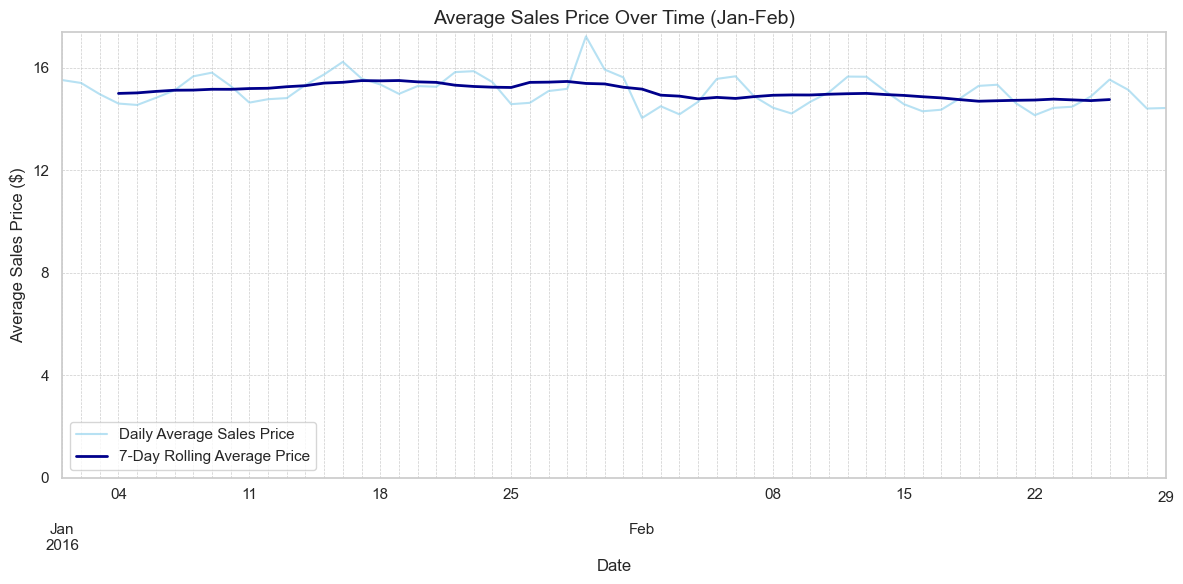

In [117]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
avg_price_trend = sales.groupby('SalesDate')['SalesPrice'].mean()

# Calculate a 7-day rolling average to smooth the data
rolling_avg_price = avg_price_trend.rolling(window=7, center=True).mean()

plt.figure(figsize=(12, 6))
# Plot daily average sales price
avg_price_trend.plot(color='skyblue', alpha=0.6, label='Daily Average Sales Price')

# Plot 7-day rolling average of sales price for smoother trend visualization
rolling_avg_price.plot(color='darkblue', linewidth=2, label='7-Day Rolling Average Price')

# Enhancements for better visualization
plt.title('Average Sales Price Over Time (Jan-Feb)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sales Price ($)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.ylim(bottom=0)  # Ensure the y-axis starts from 0
max_y_value = plt.ylim()[1]  # Get the current max value of y-axis to set the upper limit dynamically
plt.yticks(np.arange(0, max_y_value, 4))  # Set y-ticks to count by increments of 4

plt.tight_layout()
plt.show()


### 3.3 Average Sales Price Insights

1. **Price Stability**: The 7-day rolling average line shows that prices were relatively stable over the two-month period, with minor fluctuations indicating consistent pricing strategies or stable market conditions.

2. **Slight Price Increases**: There are a few instances where spikes in the daily average sales price are observable, but they tend to return to the baseline quickly. This could suggest occasional promotional activities or short-term market adjustments that temporarily influenced average prices.

3. **Consistent Baseline**: The rolling average maintains a steady baseline, suggesting that any daily price changes did not significantly impact the overall pricing trend. This indicates that the sales prices for the products are well-established in the market, without any significant long-term shifts in pricing during these months.

## 4. Purchasing Analysis

In [76]:
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))


Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


### 4.1 Vendor Purchase Volume

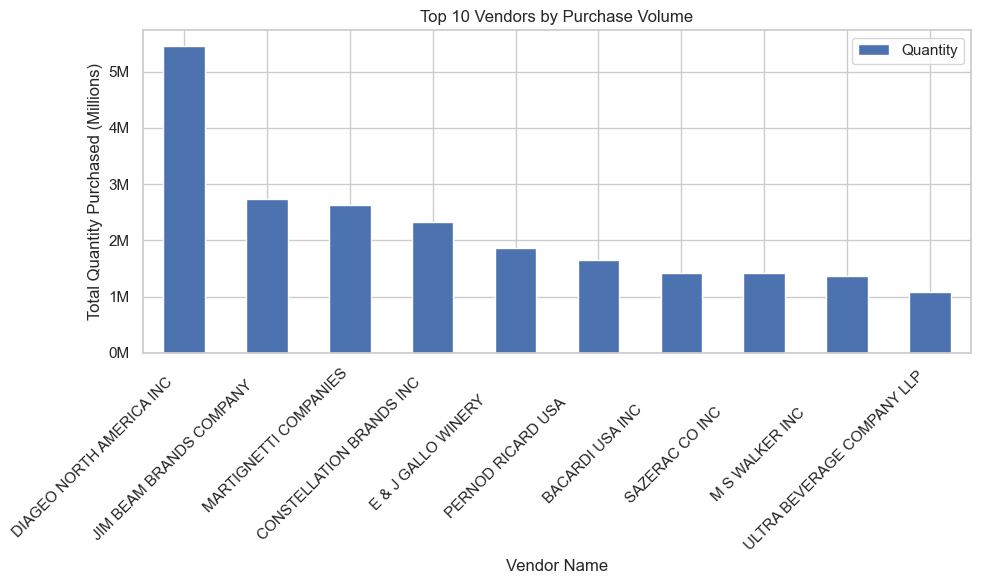

In [82]:
# Plotting the data
vendor_purchase_volume.head(10).plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Top 10 Vendors by Purchase Volume')
plt.xlabel('Vendor Name')
plt.ylabel('Total Quantity Purchased (Millions)')

# Formatting the y-axis labels 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1000000)))
)

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha="right")

# Showing the plot
plt.tight_layout()  
plt.show()


### 4.2 Vendor Purchase Cost and Volume

In [163]:
vendor_purchase_cost = purchases.groupby('VendorName').agg({'Dollars': 'sum'}).sort_values(by='Dollars', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))


Top 10 Vendors by Purchase Cost:
                                  Dollars
VendorName                              
DIAGEO NORTH AMERICA INC     50959796.85
MARTIGNETTI COMPANIES        27821473.91
JIM BEAM BRANDS COMPANY      24203060.96
PERNOD RICARD USA            24124091.56
BACARDI USA INC              17624378.72
CONSTELLATION BRANDS INC     15573917.90
BROWN-FORMAN CORP            13529433.08
ULTRA BEVERAGE COMPANY LLP   13210613.93
E & J GALLO WINERY           12289608.09
M S WALKER INC               10935725.47


In [164]:
# Merge the two dataframes on VendorName
merged_vendor = pd.merge(vendor_purchase_volume, vendor_purchase_cost, on='VendorName')

In [165]:
merged_vendor_top_10 = merged_vendor.sort_values(by='Dollars', ascending= False).head(10)

merged_vendor_top_10

,Quantity,Dollars
VendorName,,
DIAGEO NORTH AMERICA INC,5459788,50959796.85
MARTIGNETTI COMPANIES,2637275,27821473.91
JIM BEAM BRANDS COMPANY,2737165,24203060.96
PERNOD RICARD USA,1647558,24124091.56
BACARDI USA INC,1427075,17624378.72
CONSTELLATION BRANDS INC,2325892,15573917.90
BROWN-FORMAN CORP,1006122,13529433.08
ULTRA BEVERAGE COMPANY LLP,1077527,13210613.93
E & J GALLO WINERY,1858260,12289608.09


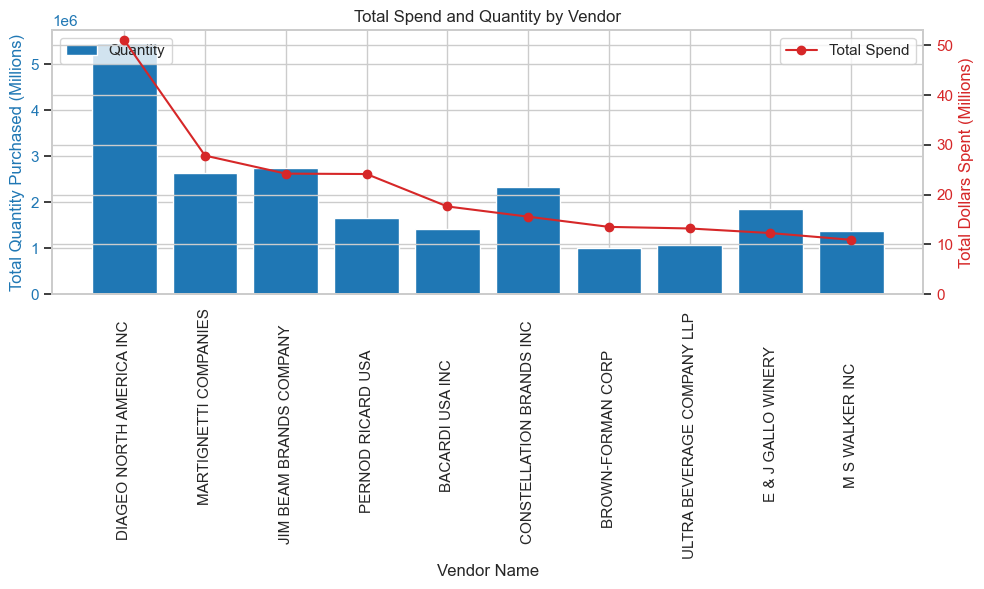

In [168]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Quantity
color = 'tab:blue'
ax1.set_xlabel('Vendor Name')
ax1.set_ylabel('Total Quantity Purchased (Millions)', color=color)
ax1.bar(merged_vendor_top_10.index, merged_vendor_top_10['Quantity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Dollars Spent (Millions)', color=color)  
# Divide the dollar amounts by 1,000,000 to convert to millions for plotting
ax2.plot(merged_vendor_top_10.index, merged_vendor_top_10['Dollars'] / 1e6, color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)

# Title and layout
fig.tight_layout()
plt.title('Total Spend and Quantity by Vendor')

# Adding legend
ax1.legend(['Quantity'], loc='upper left')
ax2.legend(['Total Spend'], loc='upper right')

plt.show()


### 4.2 Vendor Spend and Quantity Insights


1. Leading Supplier Impact:
DIAGEO NORTH AMERICA INC stands out as the top vendor, leading in both quantity purchased `5,459,788` and total spend `$50,959,796.85`, showcasing their significant footprint in the supply chain.

2. Purchase and Spend Correlation:
The data exhibits a clear trend where a larger quantity purchased correlates with an increased total spend. The graph’s descending bars for quantity alongside the descending line for total spend visually represent this relationship.

3. Comparative Spend Efficiency:
ULTRA BEVERAGE COMPANY LLP has a lower quantity purchased `1,077,527` compared to MARTIGNETTI COMPANIES and CONSTELLATION BRANDS INC, yet spends more than CONSTELLATION BRANDS INC with a total of `$13,210,613.93`. This suggests that ULTRA BEVERAGE COMPANY LLP might be sourcing more premium, higher-priced products.

4. Value vs. Volume Disparity:
An interesting divergence is observed with BROWN-FORMAN CORP and M S WALKER INC. BROWN-FORMAN CORP, with a lower quantity purchased `1,006,122`, has a higher expenditure `$13,529,433.08` than M S WALKER INC, which has a higher quantity `1,372,841` but a lower spend `$10,935,725.47`. This points towards a premium pricing strategy or a focus on high-value items by BROWN-FORMAN CORP.

### 4.3 Total Spend per Month

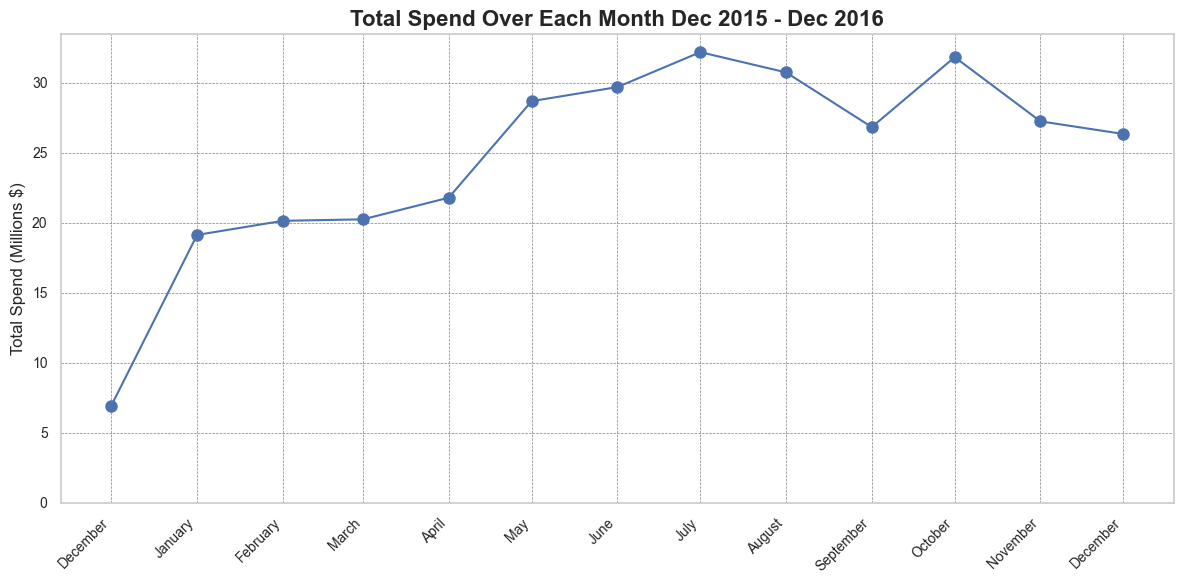

In [110]:
# Convert the date column to datetime format 
purchases['PODate'] = pd.to_datetime(purchases['PODate'])

# Extract year and month from InvoiceDate for grouping
purchases['YearMonth'] = purchases['PODate'].dt.to_period('M')

# Group by the new YearMonth column and sum the Dollars column
monthly_spend = purchases.groupby('YearMonth')['Dollars'].sum()

# Reset index to convert YearMonth from PeriodIndex to DateTimeIndex for plotting
monthly_spend = monthly_spend.reset_index()
monthly_spend['YearMonth'] = monthly_spend['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_spend['YearMonth'], monthly_spend['Dollars'] / 1e6, marker='o', markersize=8, linestyle='-', color='b')
plt.title('Total Spend Over Each Month Dec 2015 - Dec 2016', fontsize=16, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.ylabel('Total Spend (Millions $)', fontsize=12)
plt.ylim(bottom=0)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()

plt.show()


### 4.3 Total Spend Insights

Spend Growth and Peak: There is a noticeable growth in spending from December to April, where the spend increases significantly. The peak spending occurs in April, which suggests that this month may have seasonal factors or specific business events that drive higher expenditure. It would be beneficial for the business to analyze what drives the spending in April to understand whether this is due to strategic purchasing decisions, seasonal demand, or other factors.

Mid-Year Stability and End-Year Decline: After the peak in April, the total spend stabilizes and remains relatively consistent from May to September. This plateau could indicate a period of stable operations with consistent purchasing behavior. However, there is a notable decline starting in October, and this downward trend continues through to December. The year-end decline might suggest a cyclical trend in the business or industry, where spend decreases towards the end of the fiscal year, possibly due to budgetary constraints, year-end inventory adjustments, or strategic decisions to reduce expenditures in preparation for the new year.

### 4.4 Overdue Payments

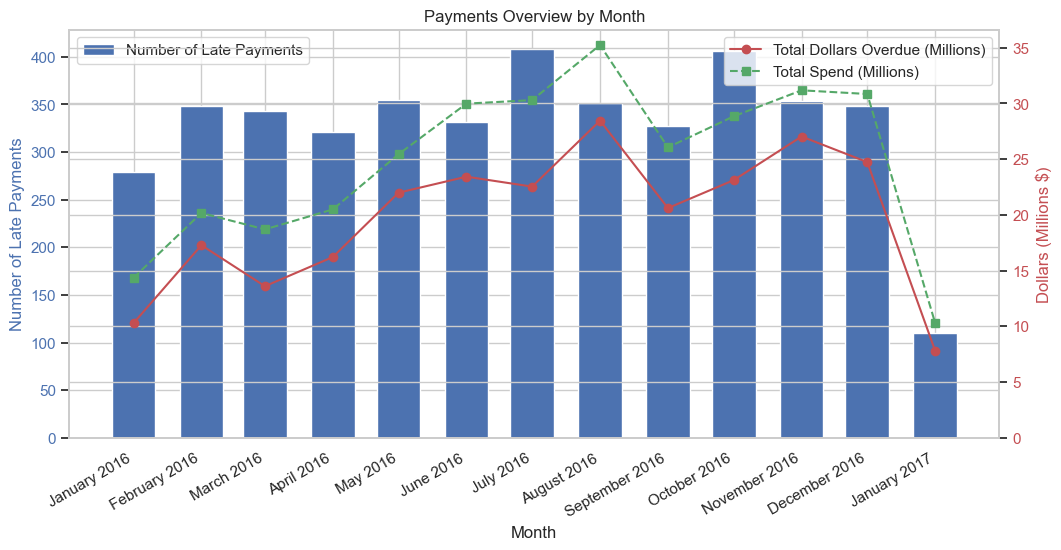

In [143]:
# Convert InvoiceDate and PayDate to datetime
invoice_purchases['InvoiceDate'] = pd.to_datetime(invoice_purchases['InvoiceDate'])
invoice_purchases['PayDate'] = pd.to_datetime(invoice_purchases['PayDate'])

# Subtract InvoiceDate from PayDate to get the PaymentDuration
invoice_purchases['PaymentDuration'] = (invoice_purchases['PayDate'] - invoice_purchases['InvoiceDate']).dt.days

# Filter for payments over 30 days
late_payments = invoice_purchases[invoice_purchases['PaymentDuration'] > 30]

# Group by the InvoiceDate month and count the occurrences of late payments
late_payments_by_month = late_payments.groupby(late_payments['InvoiceDate'].dt.to_period('M')).size()

# Convert to DateTimeIndex for plotting
late_payments_by_month.index = late_payments_by_month.index.to_timestamp()

# Calculate the total dollars of overdue payments for each month
total_dollars_overdue_by_month = late_payments.groupby(late_payments['InvoiceDate'].dt.to_period('M'))['Dollars'].sum()
total_dollars_overdue_by_month.index = total_dollars_overdue_by_month.index.to_timestamp()

# Calculate the total spend per month across all transactions
total_spend_by_month = invoice_purchases.groupby(invoice_purchases['InvoiceDate'].dt.to_period('M'))['Dollars'].sum()
total_spend_by_month.index = total_spend_by_month.index.to_timestamp()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of late payments
ax1.bar(late_payments_by_month.index, late_payments_by_month, color='b', label='Number of Late Payments', width=20)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Late Payments', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(bottom=0)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Line plot for the total dollars of overdue payments, scaled to millions
scaled_total_dollars_overdue_by_month = total_dollars_overdue_by_month / 1e6
ax2.plot(scaled_total_dollars_overdue_by_month.index, scaled_total_dollars_overdue_by_month, marker='o', linestyle='-', color='r', label='Total Dollars Overdue (Millions)')

# Line plot for the total spend that month, scaled to millions
scaled_total_spend_by_month = total_spend_by_month / 1e6
ax2.plot(scaled_total_spend_by_month.index, scaled_total_spend_by_month, marker='s', linestyle='--', color='g', label='Total Spend (Millions)')

ax2.set_ylabel('Dollars (Millions $)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(bottom=0)
# Title and layout adjustments
plt.title('Payments Overview by Month')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
fig.autofmt_xdate() # Automatically format x-axis labels to fit them nicely
ax1.grid(True)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



### 4.4 Overdue Payments Insights

Seasonal Trend in Late Payments: There is a noticeable seasonal trend in the number of late payments, with peaks occurring in the mid-year around June and July, as well as at the end of the year in November. This pattern might suggest a correlation with specific business cycles or seasonal financial activities within the company.

Discrepancy Between Spend and Overdue Payments: The total spend and the total dollars overdue do not always correlate. For instance, while the total spend appears to peak around June and July, the total dollars overdue does not follow the same pattern, particularly in June where it dips. This indicates that higher spending does not necessarily result in a proportional increase in overdue payments, suggesting effective payment management or differing terms for larger transactions.

End-of-Year Payment Behavior: There is a significant drop in both total spend and overdue payments in December and January. This drop could be due to several factors such as the closing of financial books at the end of the year, budget exhaustion, or a general slowdown in business activities during the holiday season. The sharp decrease in overdue payments in January, despite the total spend having a less dramatic decrease, could also indicate an end-of-year push to clear outstanding debts.

### 4.5 Overdue payments by Vendor

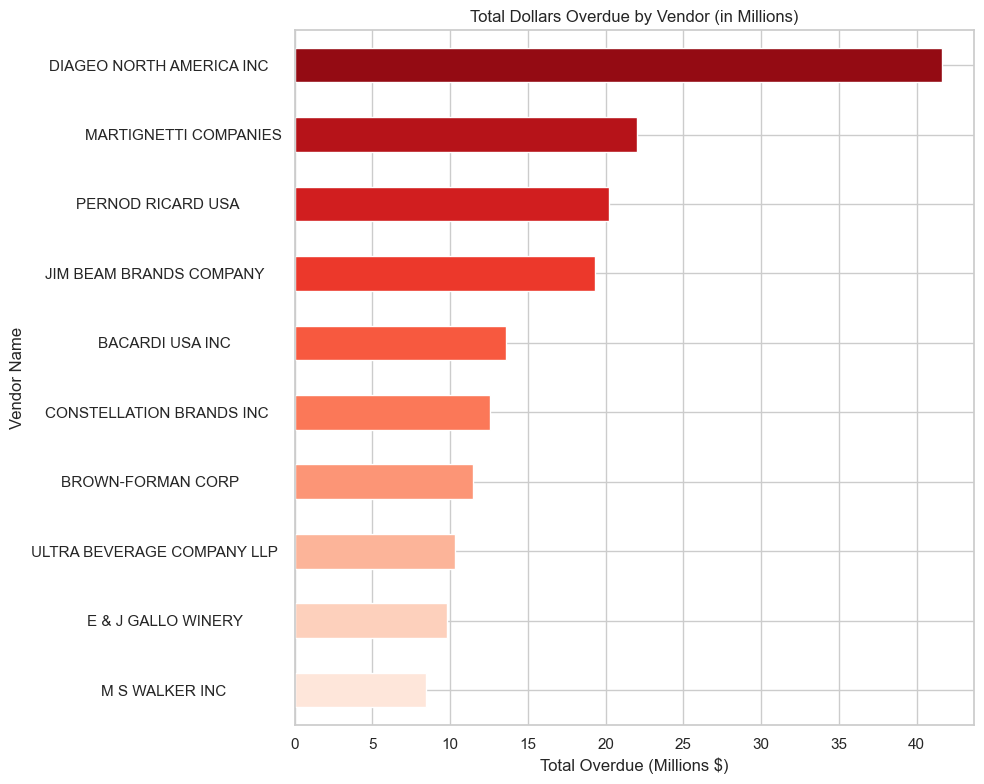

In [148]:
# Filter the DataFrame for payments over 30 days to find late payments
late_payments = invoice_purchases[invoice_purchases['PaymentDuration'] > 30]

# Sum the overdue dollars by vendor, sort in ascending order 
total_overdue_by_vendor = late_payments.groupby('VendorName')['Dollars'].sum().sort_values(ascending=True).tail(10)

# Convert the total overdue amounts to millions of dollars for readability
total_overdue_by_vendor_millions = total_overdue_by_vendor / 1e6

# Define a red color palette, the length matches the number of vendors
palette = sns.color_palette("Reds", n_colors=len(total_overdue_by_vendor_millions))

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
total_overdue_by_vendor_millions.plot(kind='barh', color=palette, title='Total Dollars Overdue by Vendor (in Millions)')

plt.xlabel('Total Overdue (Millions $)')
plt.ylabel('Vendor Name')
plt.tight_layout()  # Adjust layout to make room for labels

plt.show()


### 4.5 Overdue Payments by Vendor Insights

Dominant Overdue Amount with Top Vendors: A significant portion of the total overdue amounts is concentrated with the top two vendors: DIAGEO NORTH AMERICA INC and MARTIGNETTI COMPANIES. DIAGEO NORTH AMERICA INC, in particular, has an overdue amount that is substantially higher than any other vendor, which suggests that a considerable focus on receivables management should be directed towards transactions with this vendor.

Gradual Decrease in Overdue Amounts: There is a gradual decrease in overdue amounts as we move down the vendor list, with the bottom vendors, such as E & J GALLO WINERY and M S WALKER INC, showing much smaller overdue balances. This pattern indicates that a few vendors are responsible for the bulk of overdue payments, which could imply that targeted strategies to address overdue payments may be most effective if they are focused on the vendors with the highest overdue amounts.

### 4.6 Distribution of Late Payments

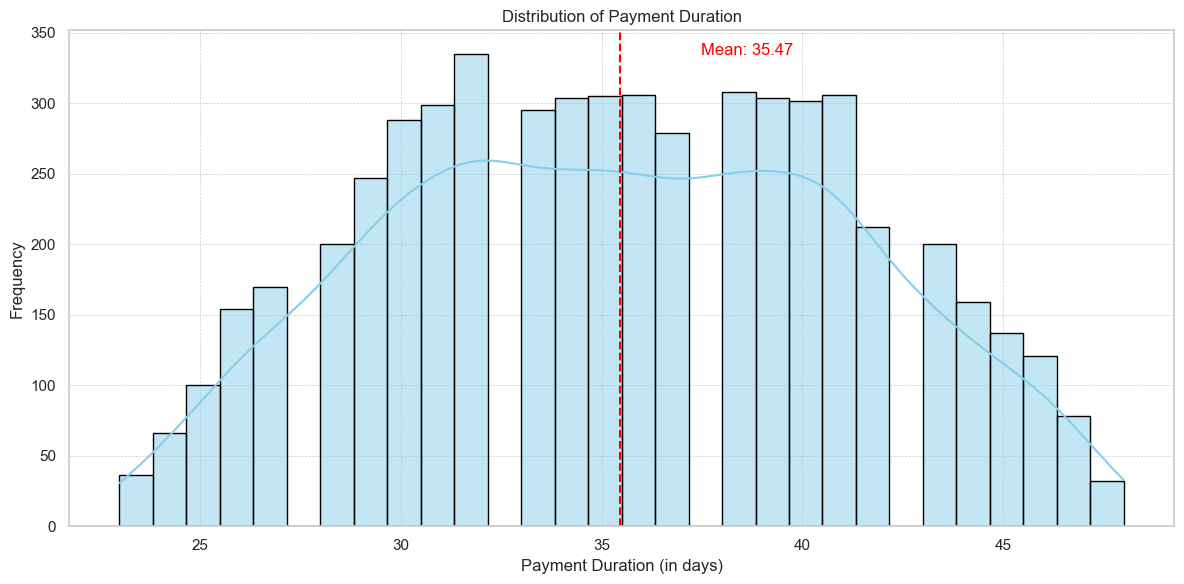

In [152]:
# Set the visual style of the plots
sns.set_style("whitegrid")

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
histplot = sns.histplot(invoice_purchases['PaymentDuration'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')

# Add mean line and annotation
mean_val = invoice_purchases['PaymentDuration'].mean()
plt.axvline(mean_val, color='red', linestyle='--')
plt.text(mean_val + 2, histplot.get_ylim()[1]*0.95, f'Mean: {mean_val:.2f}', color = 'red')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.6 Distribution of Late Payments Insights

Central Tendency: The mean payment duration is approximately 35.47 days, which is slightly above the typical net-30 payment term that is standard in many industries. This indicates that, on average, payments are being made slightly later than the standard 30-day period.

Payment Duration Distribution: The distribution of payment durations is roughly symmetric around the mean, but there seems to be a slight right skew, with a tail extending towards longer payment durations. This suggests that while most of the payments are made around the mean duration, there are a number of payments that are taking significantly longer to be completed, which could be a sign of delays in the payment process or extended payment terms for certain transactions.

## 5. Conclusion

- Data integrity efforts, including handling missing data and deducing values, significantly enhance analysis accuracy, informing strategic decision-making for inventory and procurement.
- Notable findings include the rising popularity of "Ketel One Vodka" and the consistent performance of "Capt Morgan Spiced Rum," reflecting consumer preferences and the importance of inventory alignment.
- The presence of products with zero inventory highlights areas for reassessment, potentially indicating supply chain issues or misaligned inventory strategies.
- Sales and inventory data reveal a well-aligned demand forecasting for top performers, suggesting an effective inventory management system, while identifying overstock risks for low-sale products.
- Store analyses show dynamic inventory adjustments in top-performing stores and highlight critical areas for improvement in stores with persistent low inventory or significant stockouts.
- Vendor analysis indicates a direct correlation between quantity purchased and total dollars spent, with insights into pricing strategies and the importance of managing relationships with key suppliers.
- Seasonal spending trends and late payment patterns offer insights into business cycles, emphasizing the need for strategic purchasing and payment management to optimize financial operations.
- Payment duration analysis underscores the need for reviewing payment processes and terms, suggesting opportunities for improving cash flow management and vendor relationships.

These insights underline the critical role of data-driven decision-making in optimizing inventory management, enhancing procurement strategies, and maintaining financial health through strategic adjustments and targeted actions.